# Implementation Neural Network for Digit Classfication

### Author: Sunwoo Choi

### Data
mnist from keras.datasets


In [ ]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:

train_X = train_X.reshape(train_X.shape[0], train_X.shape[1]* train_X.shape[2])
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1]* test_X.shape[2])


In [ ]:
digits = 10
cate_train_y = np.zeros((train_y.size, digits))
cate_train_y[range(train_y.shape[0]), train_y] = 1

cate_test_y = np.zeros((test_y.size, digits))
cate_test_y[range(test_y.shape[0]), test_y] = 1


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Simple 1 inner layer neural network 

model = keras.Sequential(
    [
        layers.Dense(128, activation="sigmoid", name="hidden", input_shape=(784,)), # hidden layer
        layers.Dense(10, activation="softmax", name="output"), # output layer
    ]
)

model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer='adam') # adam is stochastic gradient descent method

# Each iteration, testing all samples in training set (bathch_size = 60000)
history = model.fit(train_X, cate_train_y,
          batch_size=60000, epochs=100,
          verbose=2,
          validation_data=(test_X, cate_test_y))



Epoch 1/100
1/1 - 1s - loss: 0.1018 - accuracy: 0.0523 - val_loss: 0.0933 - val_accuracy: 0.1323
Epoch 2/100
1/1 - 0s - loss: 0.0935 - accuracy: 0.1288 - val_loss: 0.0866 - val_accuracy: 0.2497
Epoch 3/100
1/1 - 0s - loss: 0.0870 - accuracy: 0.2357 - val_loss: 0.0806 - val_accuracy: 0.3387
Epoch 4/100
1/1 - 0s - loss: 0.0812 - accuracy: 0.3308 - val_loss: 0.0748 - val_accuracy: 0.4243
Epoch 5/100
1/1 - 0s - loss: 0.0754 - accuracy: 0.4193 - val_loss: 0.0690 - val_accuracy: 0.5124
Epoch 6/100
1/1 - 0s - loss: 0.0698 - accuracy: 0.5023 - val_loss: 0.0636 - val_accuracy: 0.5758
Epoch 7/100
1/1 - 0s - loss: 0.0644 - accuracy: 0.5676 - val_loss: 0.0589 - val_accuracy: 0.6137
Epoch 8/100
1/1 - 0s - loss: 0.0597 - accuracy: 0.6037 - val_loss: 0.0551 - val_accuracy: 0.6380
Epoch 9/100
1/1 - 0s - loss: 0.0560 - accuracy: 0.6246 - val_loss: 0.0520 - val_accuracy: 0.6497
Epoch 10/100
1/1 - 0s - loss: 0.0529 - accuracy: 0.6391 - val_loss: 0.0494 - val_accuracy: 0.6654
Epoch 11/100
1/1 - 0s - loss:

It is much faster and shows better performance

In [ ]:
print(history)

Text(0.5, 0, 'epoch')

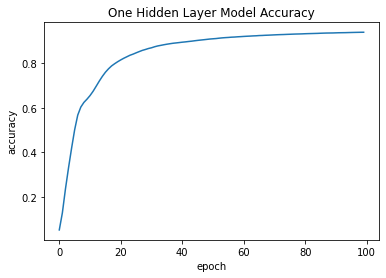

In [ ]:
import matplotlib.pyplot as plt 

# plotting the metrics
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.title('One Hidden Layer Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')


In [ ]:
# Use ReLU activation function

model2 = keras.Sequential(
    [
        layers.Dense(128, activation="relu", name="hidden", input_shape=(784,)),
        layers.Dense(10, activation="softmax", name="output"),
    ]
)

model2.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer='adam') # adam is stochastic gradient descent method

history2 = model2.fit(train_X, cate_train_y,
          batch_size=60000, epochs=100,
          verbose=2,
          validation_data=(test_X, cate_test_y))


Epoch 1/100
1/1 - 1s - loss: 0.1772 - accuracy: 0.1050 - val_loss: 0.1585 - val_accuracy: 0.1994
Epoch 2/100
1/1 - 0s - loss: 0.1570 - accuracy: 0.2067 - val_loss: 0.1446 - val_accuracy: 0.2691
Epoch 3/100
1/1 - 0s - loss: 0.1446 - accuracy: 0.2700 - val_loss: 0.1350 - val_accuracy: 0.3195
Epoch 4/100
1/1 - 0s - loss: 0.1341 - accuracy: 0.3238 - val_loss: 0.1275 - val_accuracy: 0.3578
Epoch 5/100
1/1 - 0s - loss: 0.1267 - accuracy: 0.3618 - val_loss: 0.1225 - val_accuracy: 0.3840
Epoch 6/100
1/1 - 0s - loss: 0.1216 - accuracy: 0.3882 - val_loss: 0.1167 - val_accuracy: 0.4129
Epoch 7/100
1/1 - 0s - loss: 0.1158 - accuracy: 0.4176 - val_loss: 0.1109 - val_accuracy: 0.4418
Epoch 8/100
1/1 - 0s - loss: 0.1107 - accuracy: 0.4436 - val_loss: 0.1068 - val_accuracy: 0.4632
Epoch 9/100
1/1 - 0s - loss: 0.1064 - accuracy: 0.4645 - val_loss: 0.1038 - val_accuracy: 0.4780
Epoch 10/100
1/1 - 0s - loss: 0.1032 - accuracy: 0.4804 - val_loss: 0.1008 - val_accuracy: 0.4927
Epoch 11/100
1/1 - 0s - loss:

Text(0.5, 0, 'epoch')

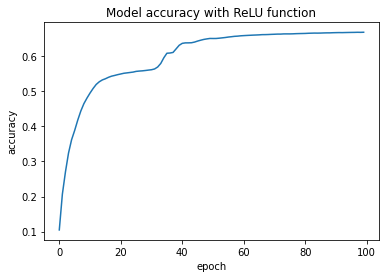

In [ ]:
import matplotlib.pyplot as plt 

fig = plt.figure()
plt.plot(history2.history['accuracy'])
plt.title('Model accuracy with ReLU function')
plt.ylabel('accuracy')
plt.xlabel('epoch')

When I change the sigmoid function to ReLU function, the increasing rate of accuracy is almost converged in 0.4.

It has a low performance.


In [ ]:
# Implementation neural network with multiple inner layers
from keras.regularizers import l2

# Testing parameters
drop_out_rates = [0.1, 0.2, 0.3]
l2_parameters = [0.1, 0.01, 0.001]

# The list of results history
li_history = []

for drop_out_rate in drop_out_rates:
  for l2_parameter in l2_parameters:

    # 3 Hidden layers with 1 Output Layer
    model3 = keras.Sequential(
        [
            layers.Dense(128, activation="sigmoid", name="hidden1", input_shape=(784,)),
            layers.Dropout(drop_out_rate),
            layers.Dense(128, activation="sigmoid", name="hidden2"),
            layers.Dropout(drop_out_rate),
            layers.Dense(128, activation="sigmoid", name="hidden3"),
            layers.Dropout(drop_out_rate),
            layers.Dense(10, activation="softmax", kernel_regularizer=l2(l2_parameter), name="output"),
        ]
    )

    model3.compile(loss='mean_squared_error', metrics=['accuracy'],optimizer='adam') # adam is stochastic gradient descent method

    history3= model3.fit(train_X, cate_train_y,
              batch_size=60000, epochs=100,
              verbose=1,
              validation_data=(test_X, cate_test_y))
    li_history.append([history3, drop_out_rate, l2_parameter])

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.0083 - accuracy: 0.0905 - val_loss: 1.9773 - val_accuracy: 0.0892
Epoch 2/100
1/1 [==============================] - 1s 790ms/step - loss: 1.9778 - accuracy: 0.0913 - val_loss: 1.9485 - val_accuracy: 0.0892
Epoch 3/100
1/1 [==============================] - 1s 810ms/step - loss: 1.9491 - accuracy: 0.0940 - val_loss: 1.9209 - val_accuracy: 0.0992
Epoch 4/100
1/1 [==============================] - 1s 810ms/step - loss: 1.9215 - accuracy: 0.0997 - val_loss: 1.8940 - val_accuracy: 0.1040
Epoch 5/100
1/1 [==============================] - 1s 810ms/step - loss: 1.8946 - accuracy: 0.1006 - val_loss: 1.8676 - val_accuracy: 0.1009
Epoch 6/100
1/1 [==============================] - 1s 806ms/step - loss: 1.8682 - accuracy: 0.1057 - val_loss: 1.8415 - val_accuracy: 0.1009
Epoch 7/100
1/1 [==============================] - 1s 815ms/step - loss: 1.8421 - accuracy: 0.1084 - val_loss: 1.8158 - val_accuracy: 0.1042
Epoch 8/100
1/1 

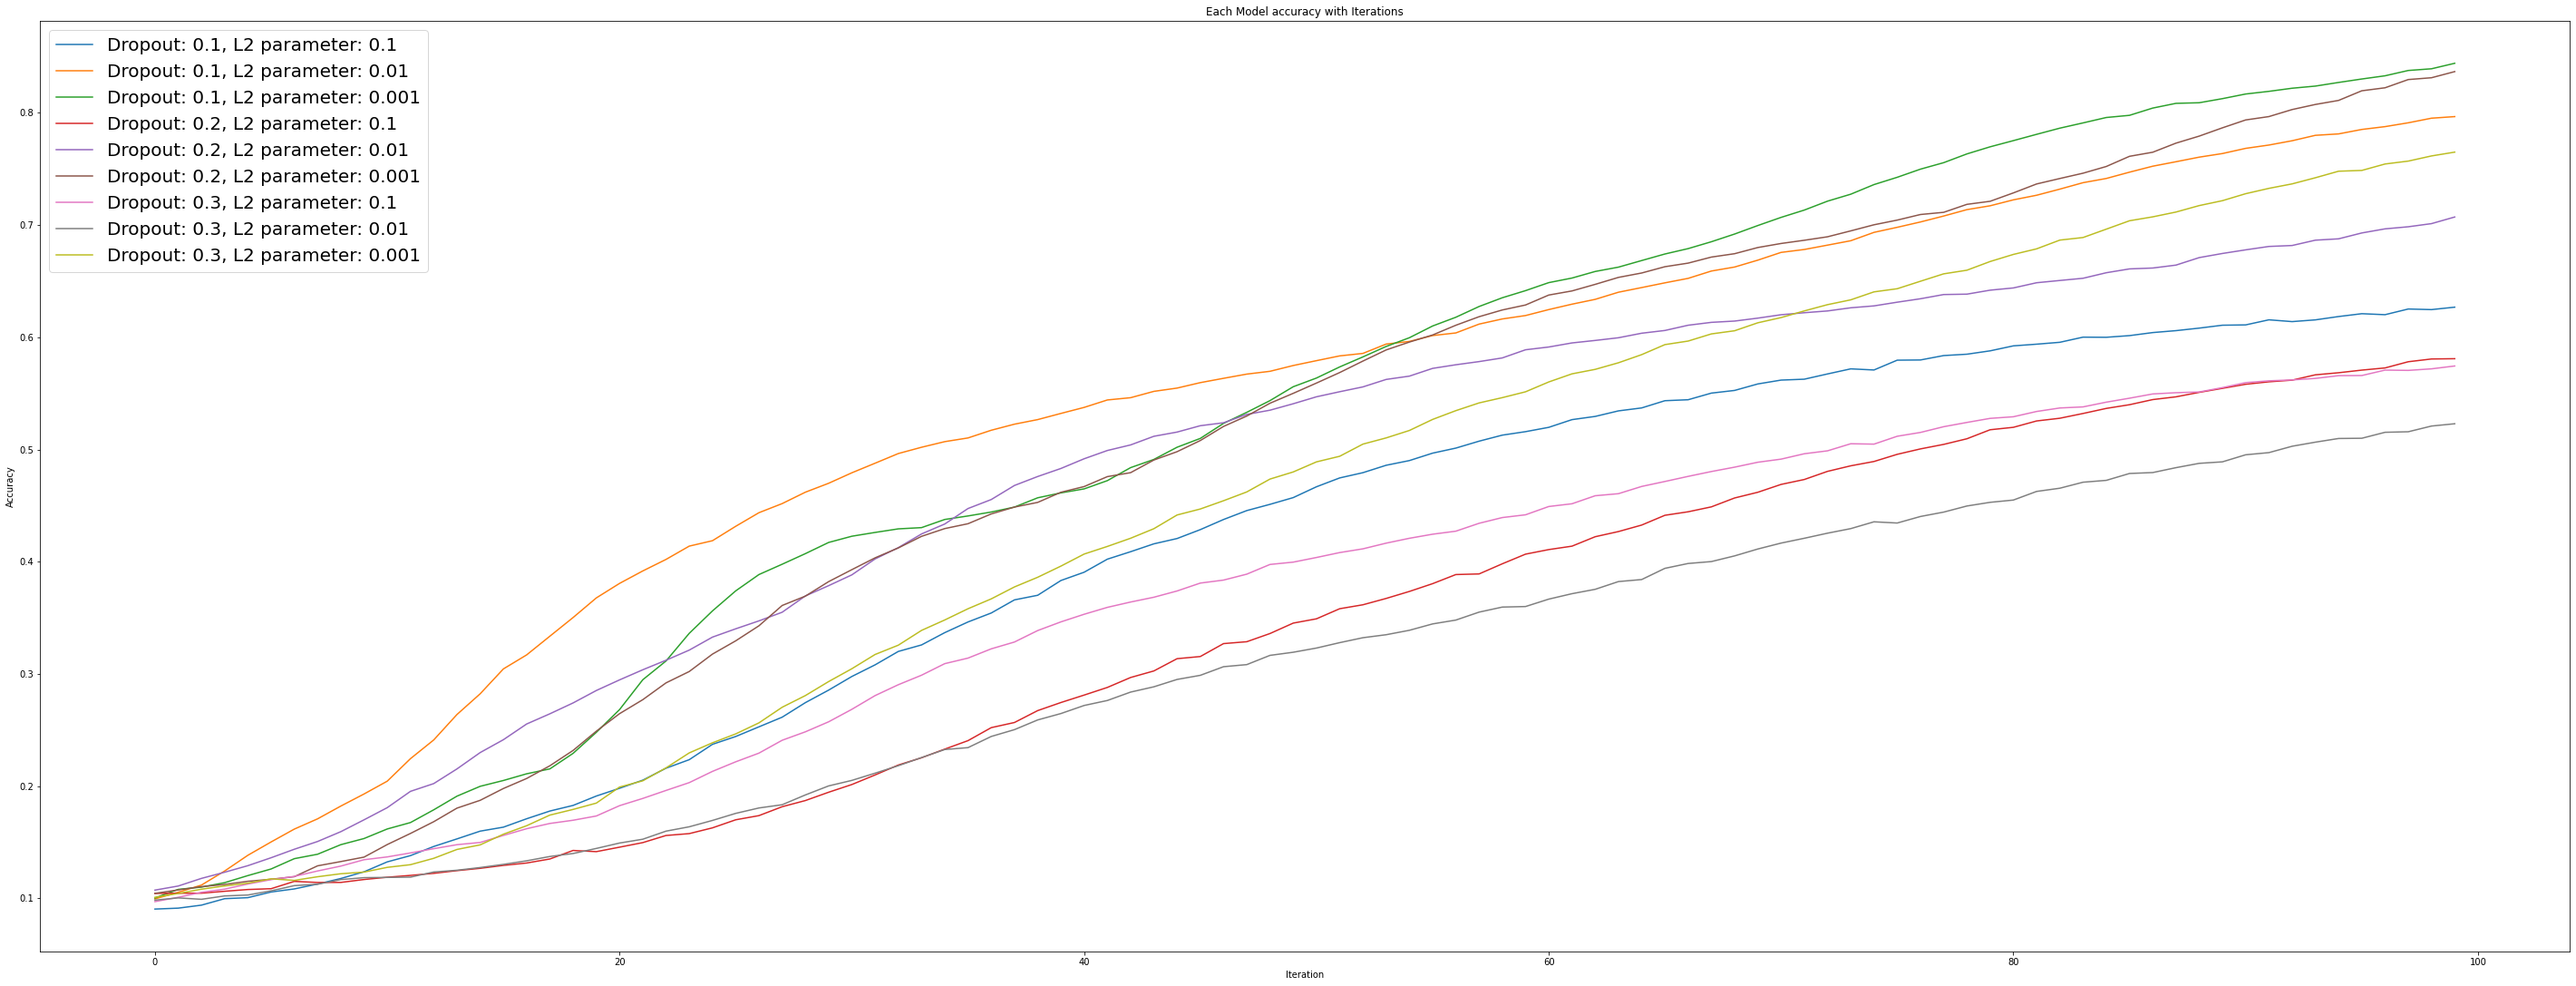

In [ ]:
# plotting the metrics
fig = plt.figure(figsize=(50,200))
plt.subplot(9,1,1)
for his in li_history:
  plt.plot(his[0].history['accuracy'], label = f'Dropout: {his[1]}, L2 parameter: {his[2]}')
plt.title('Each Model accuracy with Iterations')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(prop={'size': 20})

With droup out rate 0.1 and L2 parameter 0.001, the model shows the best performance then other 8 models.
With droup out rate 0.3 and L2 parameter 0.01, the model shows the worst performance then other 8 models.

In [ ]:
# Implementation convolutional neural network 

(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Reshapeing sample data from 2D convolution
train_X = train_X.reshape((60000, 28, 28, 1))
test_X = test_X.reshape((10000, 28, 28, 1))

li_act = ['relu', 'sigmoid']
li_filter = [32, 16, 8]
li_kernel_size = [(2,2), (3,3), (4,4)]
li_history6 = []

for act in li_act:
  for fil in li_filter:
    for ker_size in li_kernel_size:
      model6 = keras.Sequential(
          [
          layers.Conv2D(fil, ker_size, activation=act, input_shape=(28, 28, 1)),
          layers.MaxPooling2D((2, 2)),
          layers.Flatten(), # need to be flatted from 2d to 1d
          layers.Dense(64, activation='relu'),
          layers.Dense(10, activation='softmax'),
          ]
      )

      model6.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

      model6.fit(train_X, train_y, epochs=5)

      history6= model6.fit(train_X, train_y,
                    epochs=5,
                    verbose=1,
                    validation_data=(test_X, test_y))
      li_history6.append([history6, act, fil, ker_size])

Epoch 1/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5717 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1074 - accuracy: 0.9682
Epoch 3/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0772 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0622 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0509 - accuracy: 0.9842
Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0412 - accuracy: 0.9867 - val_loss: 0.0763 - val_accuracy: 0.9800
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.1007 - val_accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.1014 - val_accuracy: 0.9780
Epoch 4/5
1875/1875 [=============================

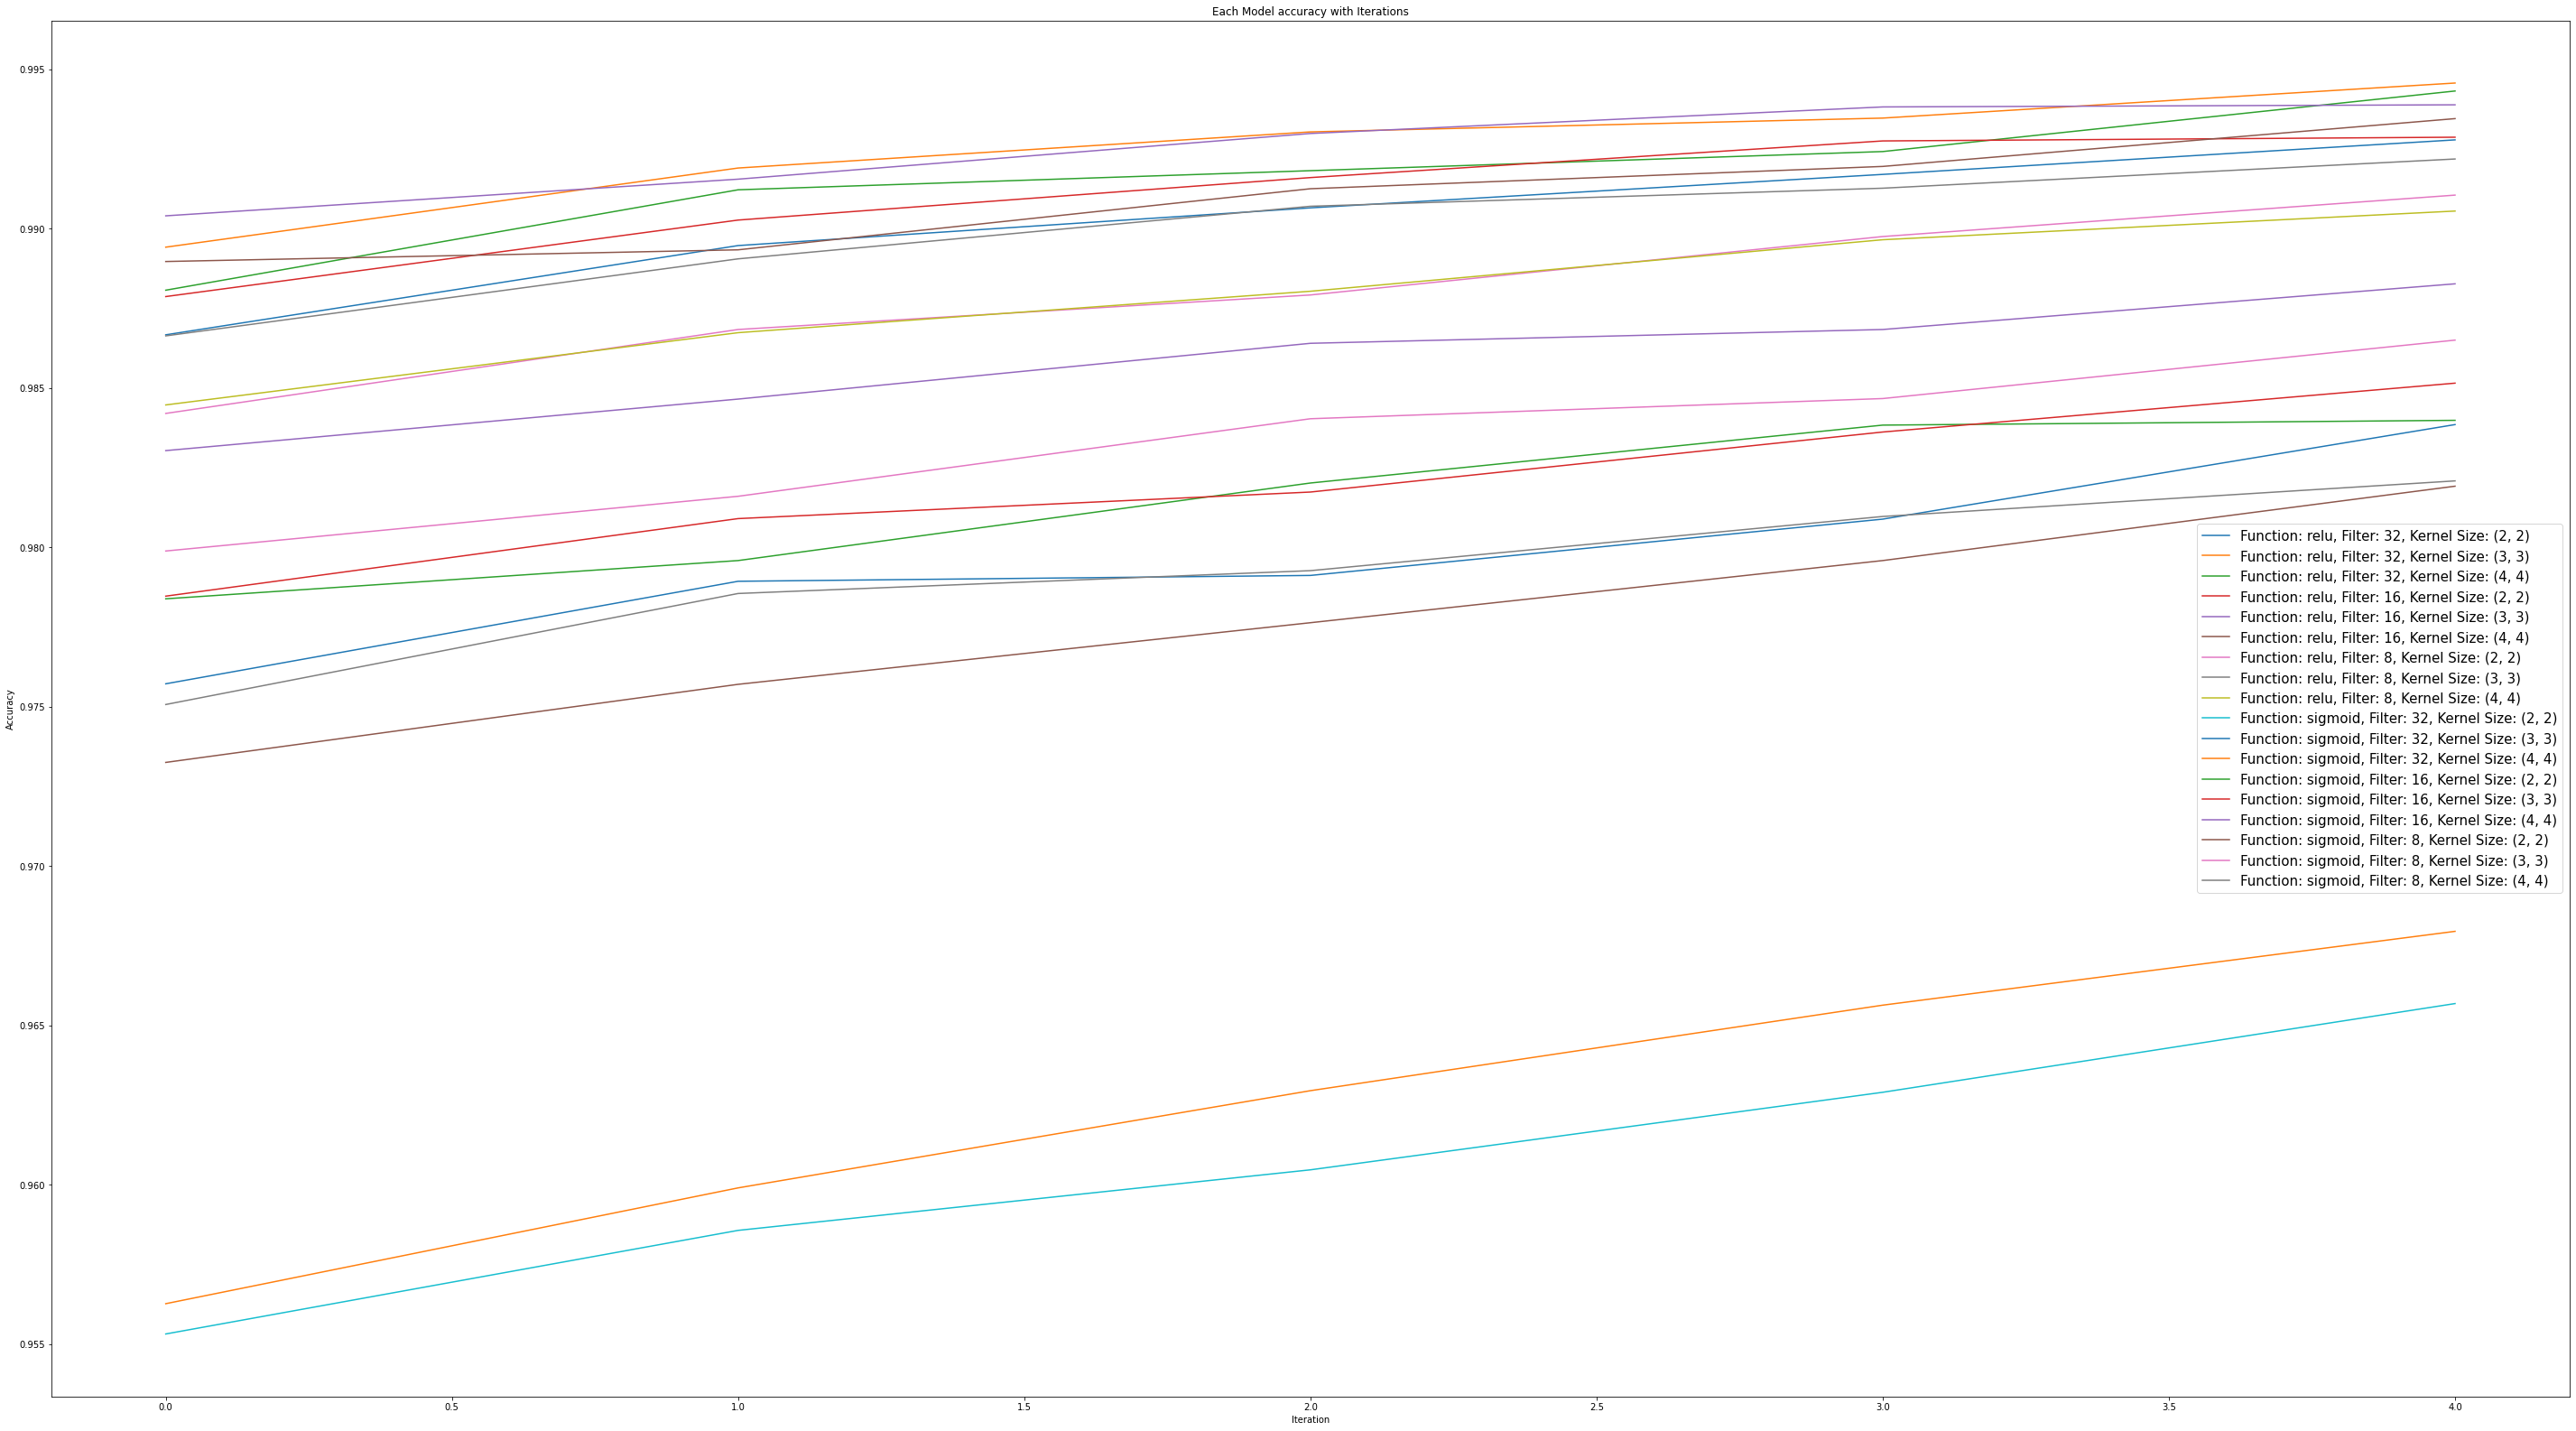

In [ ]:
# plotting the metrics
fig = plt.figure(figsize=(50,600))
plt.subplot(18,1,1)
for his in li_history6:
  plt.plot(his[0].history['accuracy'], label = f'Function: {his[1]}, Filter: {his[2]}, Kernel Size: {his[3]}')
plt.title('Each Model accuracy with Iterations')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(prop={'size':15})

Since with ReLu acitivation function with 32 ouput filters in the convolution and kernel size (3,3) shows the best performance, I will go with `layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),` parameter.

In [ ]:
# check most vulnerable images that fail to predict
model1_pre = model.predict(test_X)
model2_pre = model2.predict(test_X)
model3_pre = model3.predict(test_X)

wrong1 = []
wrong2 = []
wrong3 = []

for i in range(test_y.size):
  if np.argmax(model1_pre[i]) != test_y[i] and np.argmax(model2_pre[i]) != test_y[i] and np.argmax(model3_pre[i]) != test_y[i]:
    wrong1.append(test_X[i])

print(len(wrong1))


480


'\nhistory2 = model2.fit(train_X, cate_train_y,\n          batch_size=60000, epochs=100,\n          verbose=2,\n          validation_data=(test_X, cate_test_y))'

In [ ]:
k = np.array(wrong1)
q = k.reshape(k.shape[0], 28, 28)


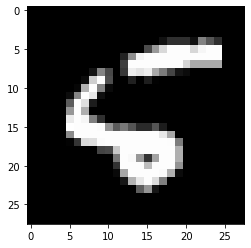

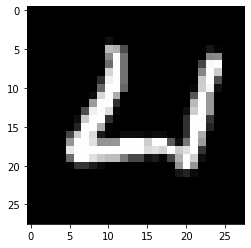

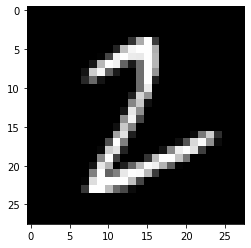

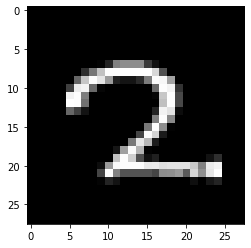

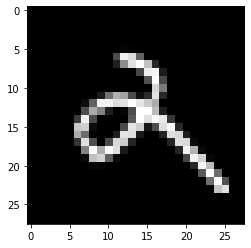

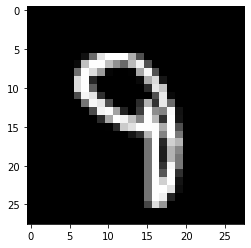

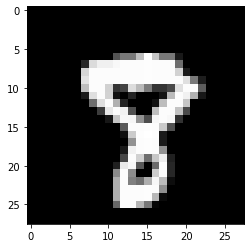

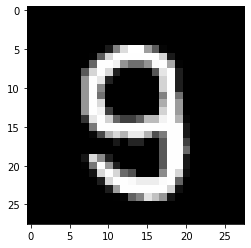

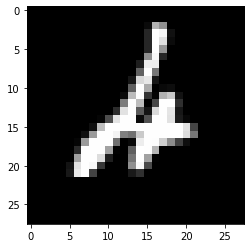

In [ ]:
import matplotlib.pyplot as plt


for i in range(9):
  plot = plt.figure(i)
  plt.imshow(q[i], cmap='gray')


1st, 2nd and the last one is hard to figure out what digit it is represented.